In [2]:
from google.colab import files
uploaded=files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv
Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [0]:
#Project Description


In [0]:
#inports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import iplot
from sklearn.linear_model import LinearRegression

In [0]:
#Reading the data
dframe=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [5]:
dframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#checking whether there are empty rows in the data
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
#Data Exploration
dframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#correlation
#Serial No is exluded in the correlation map
dframe.iloc[:,1:].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


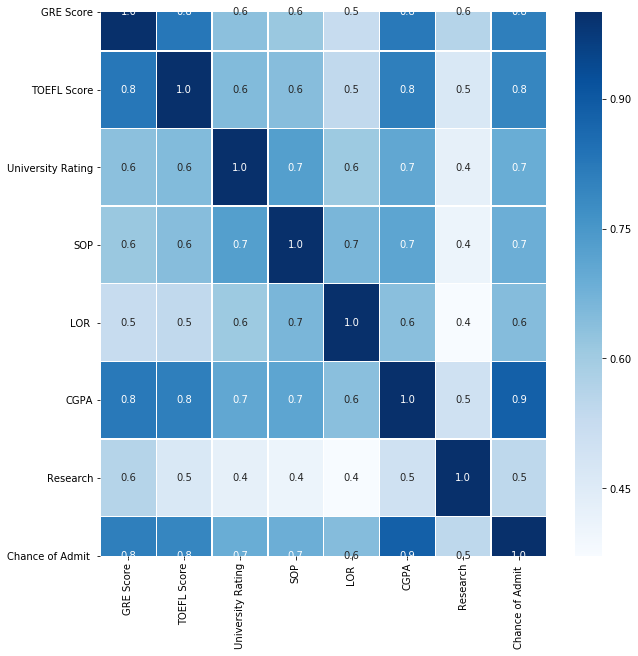

In [16]:
#Correlation Map
f,axx=plt.subplots(figsize=(10,10))
sns.heatmap(dframe.iloc[:,1:].corr(),linewidths=0.5,cmap="Blues",annot=True,fmt=".1f",ax=axx)
plt.show()

CGPA,GRE Score and TOEFL scores are 3 most correlated features for the "Chance of Admit"
Let's drop all the duplicated values from the data 

In [18]:
#Droping duplicates values of chance of admit
df=dframe.drop_duplicates(subset=["Chance of Admit "])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 457
Data columns (total 9 columns):
Serial No.           61 non-null int64
GRE Score            61 non-null int64
TOEFL Score          61 non-null int64
University Rating    61 non-null int64
SOP                  61 non-null float64
LOR                  61 non-null float64
CGPA                 61 non-null float64
Research             61 non-null int64
Chance of Admit      61 non-null float64
dtypes: float64(4), int64(5)
memory usage: 4.8 KB


In [19]:
df=df.drop_duplicates(subset="CGPA")
df=df.drop_duplicates(subset="GRE Score")
df=df.drop_duplicates(subset="TOEFL Score")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 329
Data columns (total 9 columns):
Serial No.           19 non-null int64
GRE Score            19 non-null int64
TOEFL Score          19 non-null int64
University Rating    19 non-null int64
SOP                  19 non-null float64
LOR                  19 non-null float64
CGPA                 19 non-null float64
Research             19 non-null int64
Chance of Admit      19 non-null float64
dtypes: float64(4), int64(5)
memory usage: 1.5 KB


In [20]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,35.263158,317.210526,106.631579,3.105263,3.342105,3.473684,8.473158,0.631579,0.677368
std,74.658364,13.664955,7.432739,1.242521,1.143249,1.033786,0.742818,0.495595,0.185887
min,1.000000,295.000000,93.000000,1.000000,1.000000,1.500000,7.200000,0.000000,0.380000
25%,5.500000,304.000000,102.000000,2.000000,2.750000,2.750000,7.895000,0.000000,0.490000
50%,11.000000,322.000000,107.000000,3.000000,3.500000,3.500000,8.400000,1.000000,0.720000
75%,28.500000,327.500000,111.500000,4.000000,4.000000,4.500000,9.050000,1.000000,0.820000
max,330.000000,337.000000,119.000000,5.000000,5.000000,5.000000,9.700000,1.000000,0.950000


In [21]:
#correlation
#We excluded "Serial No" with data.iloc[:,1:]))
df.iloc[:,1:].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.936140,0.852618,0.686803,0.743691,0.937316,0.692970,0.819086
TOEFL Score,0.936140,1.000000,0.822546,0.610605,0.645768,0.948491,0.654866,0.870201
University Rating,0.852618,0.822546,1.000000,0.853206,0.737538,0.894078,0.698009,0.742109
SOP,0.686803,0.610605,0.853206,1.000000,0.677880,0.721538,0.430916,0.514241
LOR,0.743691,0.645768,0.737538,0.677880,1.000000,0.667868,0.576419,0.634195
CGPA,0.937316,0.948491,0.894078,0.721538,0.667868,1.000000,0.611504,0.836335
Research,0.692970,0.654866,0.698009,0.430916,0.576419,0.611504,1.000000,0.670337
Chance of Admit,0.819086,0.870201,0.742109,0.514241,0.634195,0.836335,0.670337,1.000000


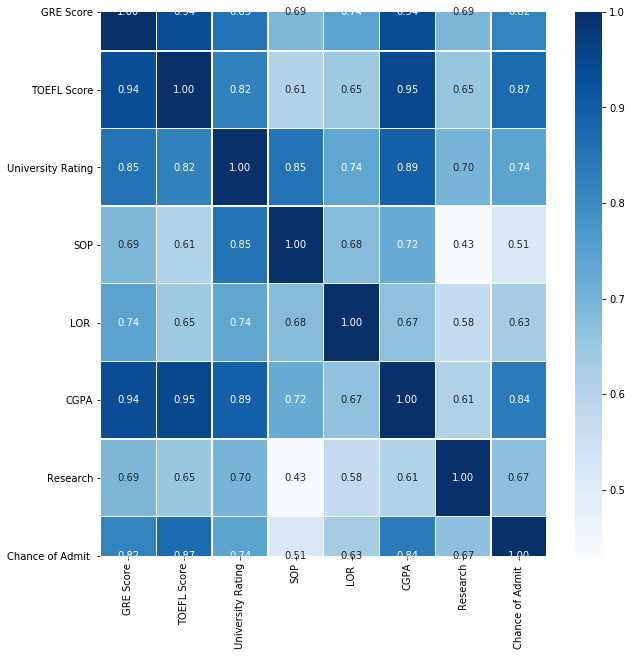

In [22]:
#correlation Map
f,axx=plt.subplots(figsize=(10,10))
sns.heatmap(df.iloc[:,1:].corr(),linewidths=0.5,cmap="Blues",annot=True,fmt=".2f",ax=axx)
plt.show()

According to the newdata frame(with non-duplicated values)
TOEFL Scores,CGPA and GRE Score are 3 most correlated features for the "Chance of Admit".

In [23]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
#Mean value of "Chance of Admit" is 0.677368.
#Outplut is an above; df.describe()
#Create a new column for High and Low.

df["Admit Level"]=["Low" if each <0.677368 else "High" for each in df["Chance of Admit "]]
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit Level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,High
2,3,316,104,3,3.0,3.5,8.00,1,0.72,High
3,4,322,110,3,3.5,2.5,8.67,1,0.80,High
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Low


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 329
Data columns (total 10 columns):
Serial No.           19 non-null int64
GRE Score            19 non-null int64
TOEFL Score          19 non-null int64
University Rating    19 non-null int64
SOP                  19 non-null float64
LOR                  19 non-null float64
CGPA                 19 non-null float64
Research             19 non-null int64
Chance of Admit      19 non-null float64
Admit Level          19 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ KB


In [31]:
#vizualization
#CGPA,GRE Scores and TOEFL scores/chance of Admit

import plotly.graph_objs as go
trace1=go.Scatter(
    x=df["Chance of Admit "],
    y=df.CGPA,
    mode="markers",
    name="CGPA",
    marker=dict(color="rgba(255,100,128,0.8)"),
    text=df["Admit Level"]
)

trace2=go.Scatter(
    x=df["Chance of Admit "],
    y=df["GRE Score"],
    mode="markers",
    name="GRE Score",
    marker=dict(color="rgba(80,80,80,0.8)"),
    text=df["Admit Level"]
)
trace3=go.Scatter(
    x=df["Chance of Admit "],
    y=df["TOEFL Score"],
    mode = "markers",
    name = "TOEFL Score",
    marker = dict(color="rgba(0,128,255,0.8)"),
    text=df["Admit Level"]
)
data=[trace1,trace2,trace3]
layout=dict(title="CGPA,GRE Score and TOEFL Scores vs Chance of Admit",xaxis=dict(title="Chance of Admit",ticklen=5,zeroline=False),
            yaxis=dict(title="Values",ticklen=5,zeroline=False)
            )
fig=dict(data=data,layout=layout)
iplot(fig)

PlotlyRequestError: ignored

Linear Regression

In [0]:
#Sklearn Library
from sklearn.linear_model import LinearRegression

Linear_reg=LinearRegression()

Fit operation includes using numpy arrays on the x and y axis, so we will us "df.ColumnName.values".and its type will be "(500)" so we will reshape it. The reason we write -1 is to don't know the size, we only need to set the second value to 1

The most correlated feature with "Chance of Admit" is "CGPA"

In [35]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

#Reshape
x=df.CGPA.values.reshape(-1,1)
y=df["Chance of Admit "].values.reshape(-1,1)
print("After reshape:\nX:",x.shape)
print("Y:",y.shape)

(19,)
(19,)
After reshape:
X: (19, 1)
Y: (19, 1)


Now we use the above axis to fir toperation for Linear Regression

In [43]:
Linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#Formula
#y=b0 + b1*x

b0=Linear_reg.intercept_
print("b0:",b0) #the spot where the linear line cuts the y-axis

b1=Linear_reg.coef_
print("b1:",b1) #slope

print("Linear Regression Formula:","y={0}+{1}*x".format(b0,b1))

b0: [-1.09596806]
b1: [[0.20928873]]
Linear Regression Formula: y=[-1.09596806]+[[0.20928873]]*x


Prediction :
We will predict the values according to linear_reg model.

In [46]:
x[0:5]

array([[9.65],
       [8.87],
       [8.  ],
       [8.67],
       [8.21]])

In [48]:
#CGPA-9.65=Chance of Admit -0.92
df[df.CGPA==9.65].loc[:,"Chance of Admit "]

0    0.92
Name: Chance of Admit , dtype: float64

In [50]:
Linear_reg.predict([[9.8]])

array([[0.95506152]])

In [51]:
print(min(x),max(x))

[7.2] [9.7]


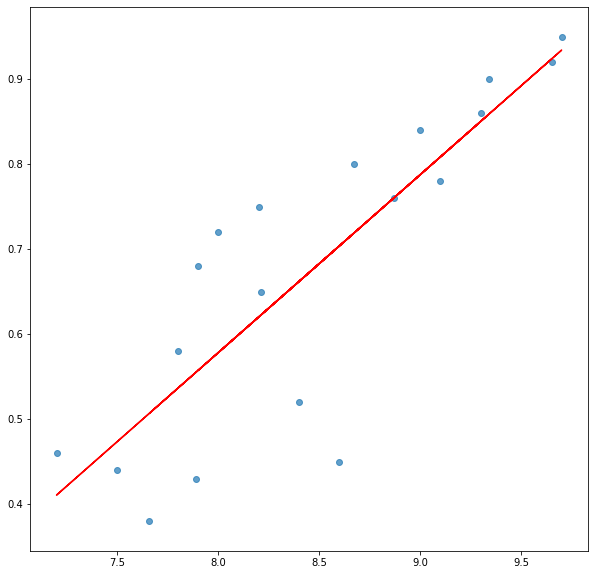

In [52]:
#CGPA values that will predicted
#chane of Admit (predicted values)
y_head=Linear_reg.predict(x)

plt.figure(figsize=(10,10))
plt.scatter(x,y,alpha=0.7) #Real values (blue)
plt.plot(x,y_head,color="red") #Predicted values for numpay array (arr).
plt.show()

R Square


We can valuate the linear regression model performance with R square



*   y: Chance of Admit values
*   y_head: predicted Chance of admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples:[500,312]



In [53]:
#same shapes
print(y.shape,y_head.shape)

(19, 1) (19, 1)


In [55]:
#R Square Library
from sklearn.metrics import r2_score
#y: Chance of Admit values.
#y_head: Predicted chance of Admit values with LR
print("r_square score: ",r2_score(y,y_head))

r_square score:  0.6994562126812605


Success ratio is around 70% for the LR prediction

1.Multiple Linear Regression
y=b0+b1x1+b2x2+....bnxn

In [0]:
#sklearn Library
#define and reshape the variables
x1=df.loc[:,["CGPA","GRE Score","TOEFL Score"]]
y1=df["Chance of Admit "].values.reshape(-1,1)


In [57]:
#create the model and fit the x,y values.
multiple_linear_regression=LinearRegression()
multiple_linear_regression.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#Formula
#y = b1 + b1*x1 + b2*x2 + ...bn*xn
b0=multiple_linear_regression.intercept_
b1,b2,b3=zip(*multiple_linear_regression.coef_)
print("b1:",b1,"b2:",b2,"b3:",b3)
print("b0:",multiple_linear_regression.intercept_)
print("b1,b2:",multiple_linear_regression.coef_)
print("Multiple Linear Regression Formula:","y={0}+{1}*x1+{2}*x2+{3}*x3".format(b0,b1,b2,b3))

b1: (0.028480619743659345,) b2: (-0.00012827027836773836,) b3: (0.019284051686432907,)
b0: [-1.57955256]
b1,b2: [[ 0.02848062 -0.00012827  0.01928405]]
Multiple Linear Regression Formula: y=[-1.57955256]+(0.028480619743659345,)*x1+(-0.00012827027836773836,)*x2+(0.019284051686432907,)*x3


2.1 Prediction

CGPA: 7.2 - 9.7
GRE Score: 295 - 337
TOEFL Score: 93 - 119


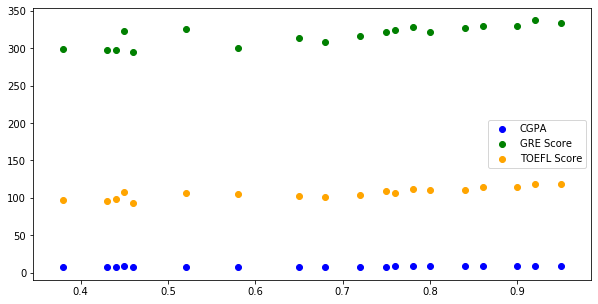

In [65]:
print("CGPA:", min(x1["CGPA"]),"-", max(x1["CGPA"]))
print("GRE Score:", min(x1["GRE Score"]),"-", max(x1["GRE Score"]))
print("TOEFL Score:", min(x1["TOEFL Score"]), "-", max(x1["TOEFL Score"]))
plt.figure(figsize=(10,5))
plt.scatter(df["Chance of Admit "], df.CGPA, color="blue", label="CGPA")
plt.scatter(df["Chance of Admit "], df["GRE Score"], color="green", label="GRE Score")
plt.scatter(df["Chance of Admit "], df["TOEFL Score"], color="orange", label="TOEFL Score")
plt.legend()
plt.show()

In [69]:
# 1st: CGPA: 6.8 - 9.92
# 2nd: GRE Score: 290 - 340
# 3rd: TOEFL Score: 92 - 120
# Prediction: Chance of Admit

print("Values= np.array( [[6,280,90]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[6,280,90]])))

print("Values= np.array( [[8,300,100]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[8,300,100]])))

print("Values= np.array( [[10,350,130]])) Prediction =",
      multiple_linear_regression.predict(np.array( [[10,350,130]])))

Values= np.array( [[6,280,90]])) Prediction = [[0.29098013]]
Values= np.array( [[8,300,100]])) Prediction = [[0.53821648]]
Values= np.array( [[10,350,130]])) Prediction = [[1.16728575]]


In [70]:
x1.head()

,CGPA,GRE Score,TOEFL Score
0,9.65,337,118
1,8.87,324,107
2,8.00,316,104
3,8.67,322,110
4,8.21,314,103


y1_head keeps the prediction values of x1 which has CGPA,GRE Score and TOEFL score values

In [71]:
y1_head=multiple_linear_regression.predict(x1)
y1_head[:5]

array([[0.92757643],
       [0.69490449],
       [0.61330036],
       [0.74731706],
       [0.60025378]])

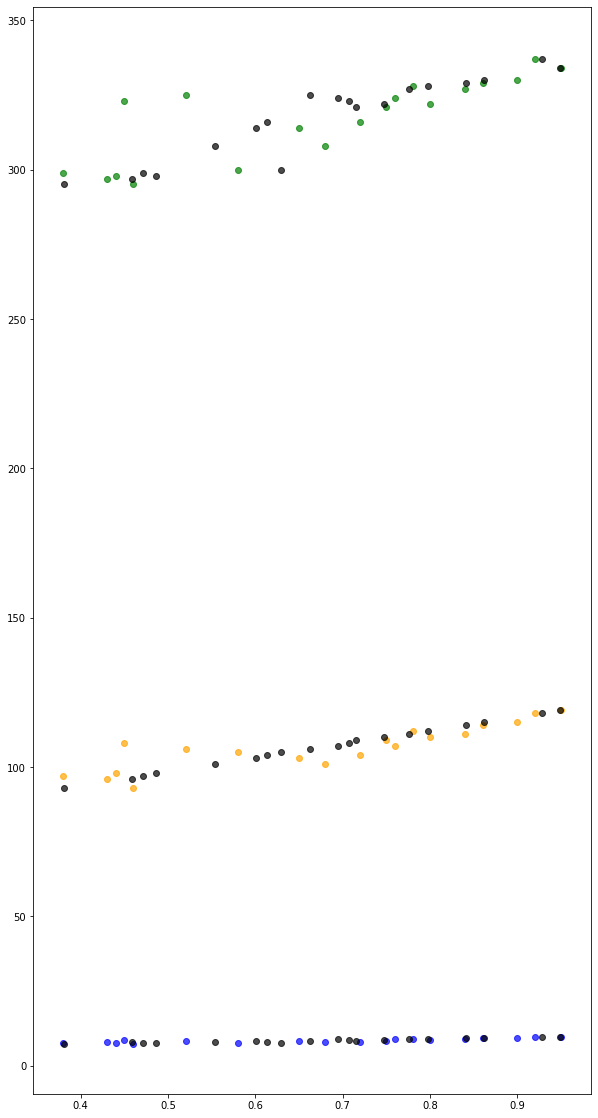

In [73]:
plt.figure(figsize=(10,20))

plt.scatter(y, x1.iloc[:,0], color="blue", alpha=0.7) # CGPA
plt.scatter(y1_head, x1.iloc[:,0], color="black", alpha=0.7)

plt.scatter(y, x1.iloc[:,1], color="green", alpha=0.7) # GRE Score
plt.scatter(y1_head, x1.iloc[:,1], color="black", alpha=0.7)

plt.scatter(y, x1.iloc[:,2],color="orange", alpha=0.7) # TOEFL  Score
plt.scatter(y1_head, x1.iloc[:,2], color="black", alpha=0.7)
plt.show()

Black values shows the predicted values, other colros are the real valus. As you can see, the predicted values are converging to the real values

2.2 R Square

In [74]:
#R Square Library

#Imported on previous sections
#from sklearn.metrics import r2_score

#y: Chance of Admit values
#y1_head: Predicted Chance of Admit values with MLR
print("r_square score:",r2_score(y,y1_head))

r_square score: 0.7584549097208307


Success ration is 75% for the MLR Prediction

1.Polynomial Regression

y=b0+b1x+b2x^2+b3x^3+...+bnx^n

In [75]:
#sklearn library
from sklearn.preprocessing import PolynomialFeatures

#we have chose the second degree equation with (degree=2)
polynomial_regression=PolynomialFeatures(degree=2)
#y=b0+b1*x+b2*x^2
x=df["TOEFL Score"].values.reshape(-1,1)
#y=df["Chance of Admit "].values.reshape(-1,1)
x_ploynomial=polynomial_regression.fit_transform(x)

linear_regression_poly=LinearRegression()
linear_regression_poly.fit(x_ploynomial,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3.1 Prediction

In [76]:
#Linear Regression(LR) section: x=df.CGPA.values.reshape(-1,1)
#Linear Regression(LR) section: y=df["Chance of Admit "].values.reshape(-1,1)
print("x:\n",x[:5],"\ny:\n",y[:5])

x:
 [[118]
 [107]
 [104]
 [110]
 [103]] 
y:
 [[0.92]
 [0.76]
 [0.72]
 [0.8 ]
 [0.65]]


In [79]:
#Predicted values
y_head_poly=linear_regression_poly.predict(x_ploynomial)
y_head_poly[:5]

array([[0.94132926],
       [0.67551513],
       [0.61101237],
       [0.74344304],
       [0.5902726 ]])

NameError: ignored

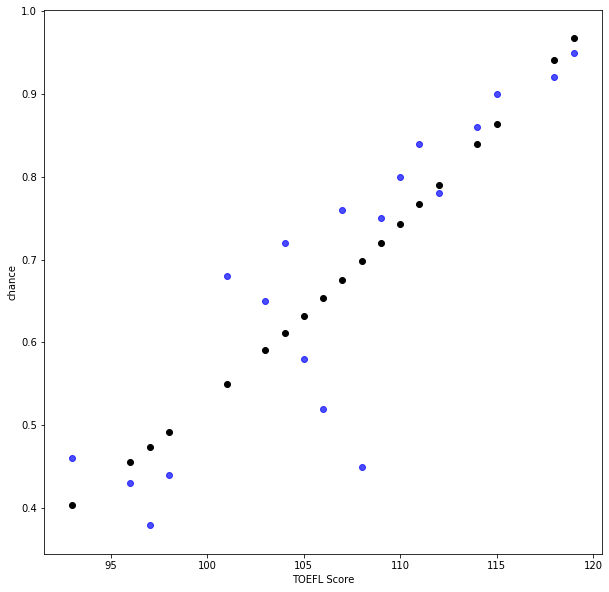

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color="blue",alpha=0.7) #CGPA
plt.scatter(x,y_head_poly,label="poly (degree=2)",color="black") #Predicted chance of admit
plt.xlabel("TOEFL Score")
plt.ylabel("chance")
ple.legend()
plt.show()

2nd degree equation didn't give a proper model.But,we can modify the degree of the euqation to converge to real values

In [0]:
#y=b0+b1*x+b2*x^2+....b10*x^10
polynomial_regression7=PolynomialFeatures(degree=7)

#x=df.CGPA.values.reshape(-1,1)
x_ploynominal_7=polynomial_regression7.fit_transform(x)

linear_regression_poly_7=LinearRegression()
linear_regression_poly_7.fit(x_ploynominal_7,y)

#Predicted values
y_head_poly_7=linear_regression_poly_7.predict(x_ploynominal_7)


In [0]:
#y=b0+b1*x+b2*x^2+....b30*x^30
polynomial_regression30=PolynomialFeatures(degree=30)

#x = df.CGPA.values.reshape(-1,1)
x_ploynominal_30=polynomial_regression30.fit_transform(x)

linear_regression_poly_30=LinearRegression()
linear_regression_poly_30.fit(x_ploynominal_30,y)

#Predicted values
y_head_poly_30=linear_regression_poly_30.predict(x_ploynominal_30)


Compare the predicted values of different equations

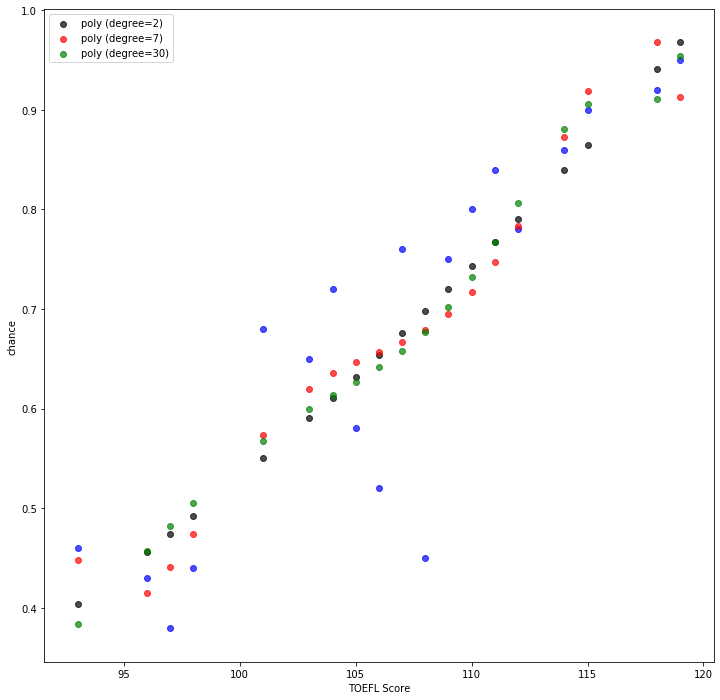

In [85]:
plt.figure(figsize=(12,12))
plt.scatter(x,y,color="blue",alpha=0.7) #TOEFL Score
plt.scatter(x,y_head_poly,label="poly (degree=2)",color="black",alpha="0.7") #predicted Chance of Admit
plt.scatter(x,y_head_poly_7,label="poly (degree=7)",color="red",alpha="0.7") #predicted Chance of Admit
plt.scatter(x,y_head_poly_30,label="poly (degree=30)",color="green",alpha="0.7") #predicted Chance of Admit
plt.xlabel("TOEFL Score")
plt.ylabel("chance")
plt.legend()
plt.show()

We can see that red predicted values(degree=7) are more convergent on the bottom-left of the graph and they ar similar with the green predicted values (degree=30) in the middle and upper-right of the graph.

The most proper degree may differ between different datas. We dont'e always have to increase it to get more accurate prediction.

3.2. R Square

In [86]:
#R Square Library
#Imported on previous sections
#from sklearn.metrics import r2_score

print("r_square score for degree=2:",r2_score(y,y_head_poly))
print("r_square score for degree=7:",r2_score(y,y_head_poly_7))
print("r_square score for degree=30:",r2_score(y,y_head_poly_30))


r_square score for degree=2: 0.7606955261605223
r_square score for degree=7: 0.7884673411122046
r_square score for degree=30: 0.7742753288897559


Success ration is 76% for degree 2 and it is 78.84% for degree 7 for PR

1.Decusuib Tree Regressuion (DTR)

In [87]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit Level
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,High
2,3,316,104,3,3.0,3.5,8.00,1,0.72,High
3,4,322,110,3,3.5,2.5,8.67,1,0.80,High
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Low


In [88]:
#Decision Tree Library
from sklearn.tree import DecisionTreeRegressor
x=df["TOEFL Score"].values.reshape(-1,1)
y=df["Chance of Admit "].values.reshape(-1,1)

tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

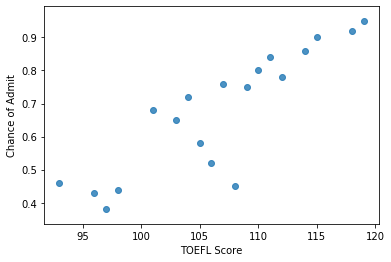

In [89]:
plt.scatter(df["TOEFL Score"],df["Chance of Admit "],alpha=0.8)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

4.1 Prediction

In [0]:
y_head_dtr=tree_reg.predict(x)

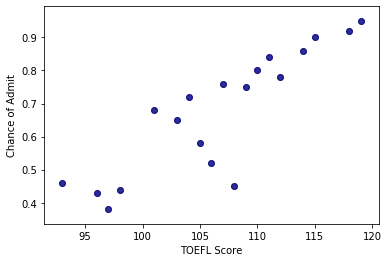

In [92]:
plt.scatter(x,y,color="blue",alpha=0.7)
plt.scatter(x,y_head_dtr,color="black",alpha=0.4)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

Black dots are predicted values and they overlap the real values. Because out prediction values(x) are same with the real values.

So,we need some other range to predict according to real x values

In [0]:
#Let's make a new array in the range of TOEFL Score values increased by 0.01
x001=np.arange(min(x),max(x),0.01).reshape(-1,1) #(start,end,increase value)
y_head001dtr=tree_reg.predict(x001)

In [94]:
len(np.unique(y_head001dtr))

19

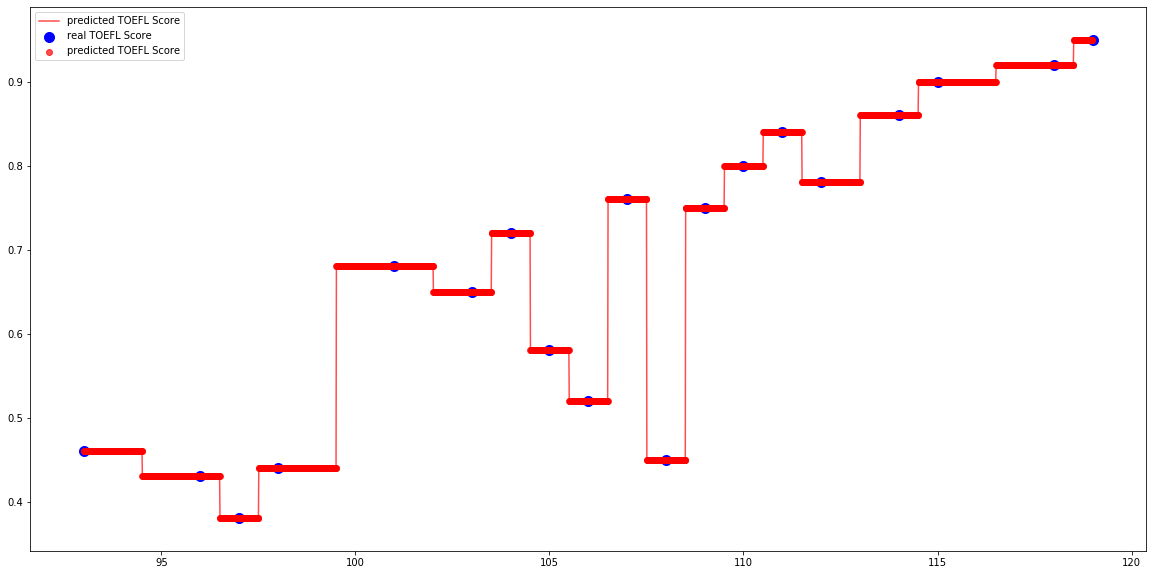

In [96]:
plt.figure(figsize=(20,10))
plt.scatter(x,y,color="blue",s=100,label="real TOEFL Score") #real y (Chance of Admit) values
plt.scatter(x001,y_head001dtr,color="red",alpha=0.7,label="predicted TOEFL Score") #to see the predicted values one by one
plt.plot(x001,y_head001dtr,color="red",alpha=0.7,label="predicted TOEFL Score") # to see the average values for each leaf
plt.legend()
plt.show()

Black plot shows the predicted values, red points show them one by one. As you can see, TOEFL Score values(x) divided between leaves (ranges) and each leaf have an average values as the predicted value. So, we see a constant line for each leaf

4.2. R Square

In [97]:
#Same shapes, y and y_head_dtr
print(y.shape,y_head_dtr.shape,y_head001dtr.shape)

(19, 1) (19,) (2600,)


In [98]:
from sklearn.metrics import r2_score
print("r_score:",r2_score(y,y_head_dtr))

r_score: 1.0


Success ration is 100% DTR

sklearn.tree.DecisionTreeRegressor

score(self, X, y, sample_weight=None)

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Parameters: X : array-like, shape = (n_samples, n_features) Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

y : array-like, shape = (n_samples) or (n_samples, n_outputs) True values for X.

sample_weight : array-like, shape = [n_samples], optional Sample weights.

Returns:
score : float R^2 of self.predict(X) wrt. y.

Notes

The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with metrics.r2_score. This will influence the score method of all the multioutput regressors (except for multioutput.MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call metrics.r2_score directly or make a custom scorer with metrics.make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

In [102]:
from sklearn.model_selection import cross_val_score
#cross_val_score(tree_reg,boston.data,boston.target,cv=10)
print(tree_reg.score(x001,y_head001dtr))
print(tree_reg.score(x,y))

1.0
1.0


In [104]:
from sklearn.metrics import r2_score
print("r_score:",r2_score(y,y_head_dtr))

from sklearn.model_selection import cross_val_score
print(tree_reg.score(x001,y_head001dtr))
print(tree_reg.score(x,y))

r_score: 1.0
1.0
1.0


Random Forest Regression

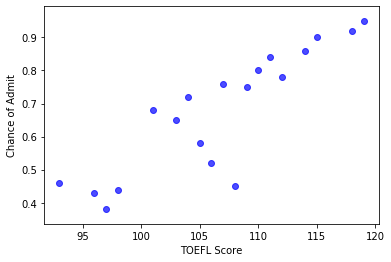

In [106]:
#plot
plt.scatter(x,y,color="blue",alpha=0.7)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

In [108]:
#Prediction
x=df["TOEFL Score"].values.reshape(-1,1)
y=df["Chance of Admit "].values.reshape(-1,1)
print(min(x),max(x))
print(min(y),max(y))

[93] [119]
[0.38] [0.95]


In [110]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor
 
random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x,y)

print(random_forest_reg.predict([[98]]))

[0.4293]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [112]:
#New prediction examples with (Start,End,Increase)
x001=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head001rf=random_forest_reg.predict(x001)

print(min(x001),max(x001))
print(min(y_head001rf),max(y_head001rf))

[93.] [118.99]
0.40060000000000023 0.9309000000000016


In [113]:
len(np.unique(y_head001rf))

46

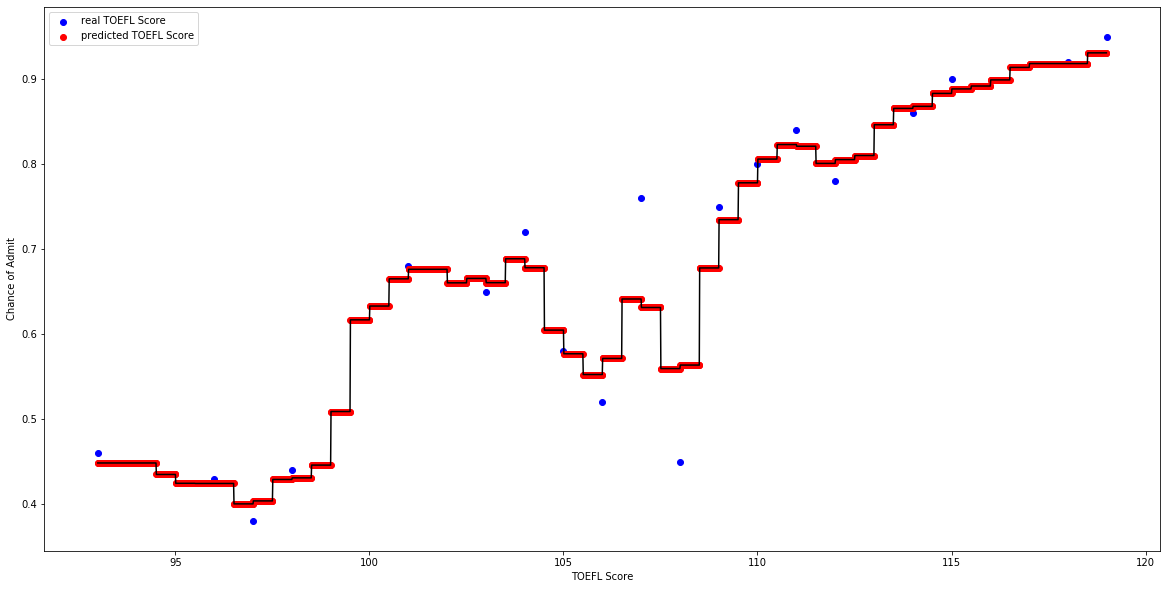

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(x,y, color="blue", label="real TOEFL Score")
plt.scatter(x001,y_head001rf, color="red", label="predicted TOEFL Score")
plt.plot(x001,y_head001rf, color="black")
plt.legend()
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

Random forest regression(RFR) uses more trees (100), it gave more accurate predicted values than Decision Tree Regression(DTR)

5.2 R Square

In [116]:
from sklearn.model_selection import cross_val_score
print(tree_reg.score(x001,y_head001rf))
print(tree_reg.score(x,y))

0.9441459078165767
1.0


In [117]:
from sklearn.metrics import r2_score

y_headrf=random_forest_reg.predict(x)
print("r_score: ",r2_score(y,y_headrf))

from sklearn.model_selection import cross_val_score
print(tree_reg.score(x001,y_head001rf))
print(tree_reg.score(x,y))

r_score:  0.9405634775839017
0.9441459078165767
1.0
